In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Deze niet runnen
file_path = 'merged_global_education_world_happiness.csv'
df = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = [
    'Country',
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Keep only the specified columns
filtered_df = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_global_education_world_happiness.csv', index=False)

print("Filtered CSV file has been created successfully.")

In [ ]:
# Deze niet runnen

import pandas as pd

# Read the CSV file (CSV file is renamed)
file_path = 'merged_global_education_world_happiness.csv'
df = pd.read_csv(file_path)

# Specify the columns to keep initially (before averaging)
columns_to_keep = [
    'Country',
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Keep only the specified columns
filtered_df = df[columns_to_keep]

# Calculate the average of the specified pairs of columns and create new columns
filtered_df['Average_OOSR_Female'] = filtered_df[['OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Female']].mean(axis=1).astype(int)
filtered_df['Average_OOSR_Male'] = filtered_df[['OOSR_Lower_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Male']].mean(axis=1).astype(int)
filtered_df['Average_Completion_Rate_Male'] = filtered_df[['Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Upper_Secondary_Male']].mean(axis=1).astype(int)
filtered_df['Average_Completion_Rate_Female'] = filtered_df[['Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Female']].mean(axis=1).astype(int)

# Drop the original columns that were averaged
filtered_df = filtered_df.drop(columns=[
    'OOSR_Lower_Secondary_Age_Male',
    'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male',
    'OOSR_Upper_Secondary_Age_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Female'
])

# Reorder the columns to include the new average columns in a logical order
final_columns = [
    'Country',
    'Average_OOSR_Male',
    'Average_OOSR_Female',
    'Average_Completion_Rate_Male',
    'Average_Completion_Rate_Female',
    'Lower_Secondary_End_Proficiency_Reading',
    'Lower_Secondary_End_Proficiency_Math',
    'Ladder score',
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices'
]

# Ensure the DataFrame is in the correct order
filtered_df = filtered_df[final_columns]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_global_education_world_happiness_average.csv', index=False)

print("Filtered CSV file with the average columns has been created successfully.")


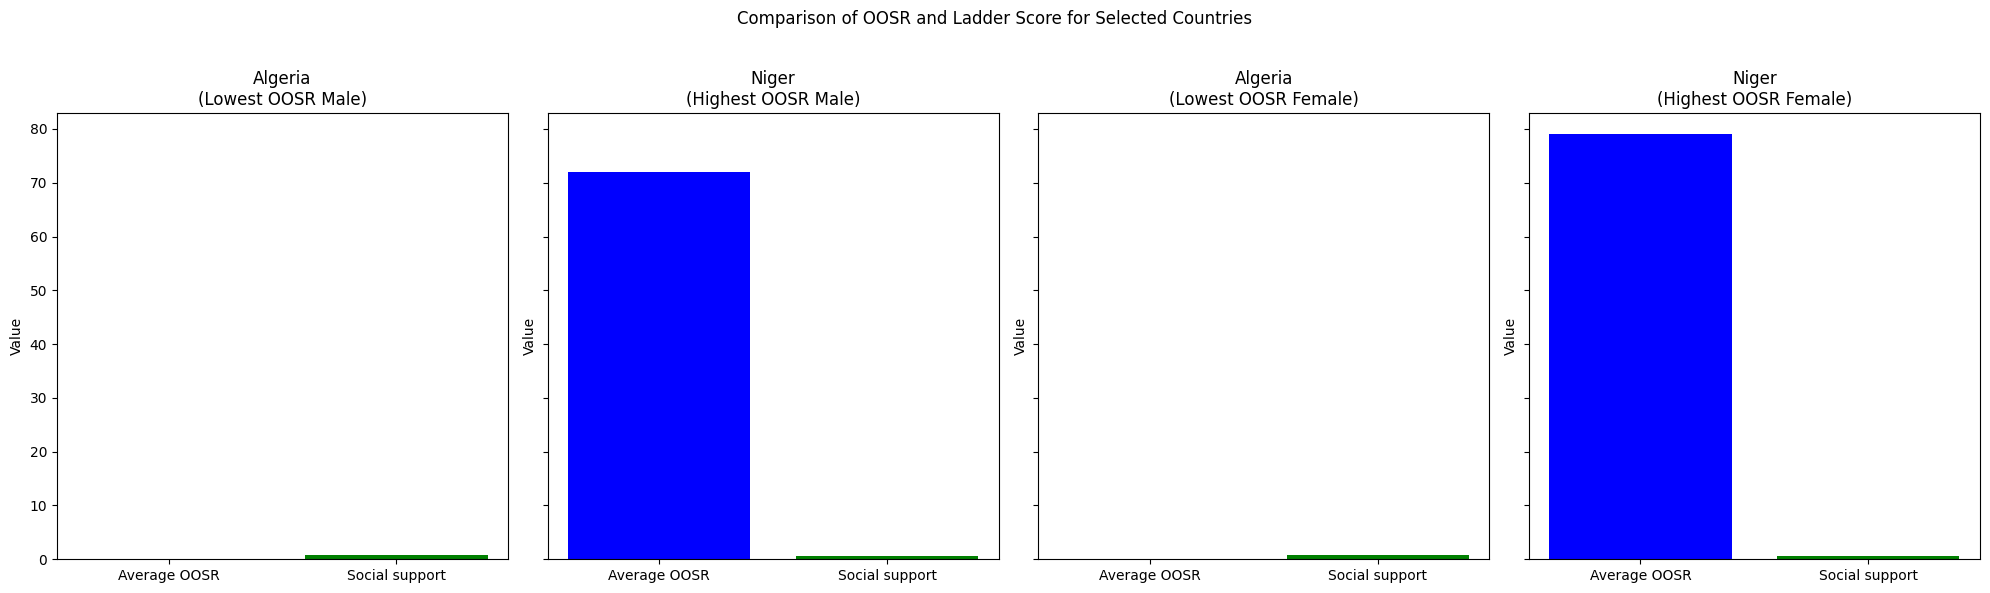

In [4]:
# Load the filtered CSV file
file_path = "filtered_global_education_world_happiness_average.csv"
filtered_df = pd.read_csv(file_path)

# Check if the 'country' column exists
if 'Country' not in filtered_df.columns:
    raise KeyError("The 'country' column is not present in the CSV file.")

# Ensure all necessary columns are present
required_columns = [
    'Country', 'Average_OOSR_Male', 'Average_OOSR_Female', 'Social support'
]

missing_columns = [col for col in required_columns if col not in filtered_df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the CSV file: {missing_columns}")

# Find the countries with the lowest and highest average OOSR Male and Female
lowest_oosr_male_country = filtered_df.loc[filtered_df['Average_OOSR_Male'].idxmin()]
highest_oosr_male_country = filtered_df.loc[filtered_df['Average_OOSR_Male'].idxmax()]
lowest_oosr_female_country = filtered_df.loc[filtered_df['Average_OOSR_Female'].idxmin()]
highest_oosr_female_country = filtered_df.loc[filtered_df['Average_OOSR_Female'].idxmax()]

# Prepare the data for plotting
countries = [lowest_oosr_male_country, highest_oosr_male_country, lowest_oosr_female_country, highest_oosr_female_country]
labels = ['Lowest OOSR Male', 'Highest OOSR Male', 'Lowest OOSR Female', 'Highest OOSR Female']

# Plot the data
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

for ax, country, label in zip(axes, countries, labels):
    avg_oosr = country['Average_OOSR_Male'] if 'Male' in label else country['Average_OOSR_Female']
    social_support = country['Social support']
    ax.bar(['Average OOSR', 'Social support'], [avg_oosr, social_support], color=['blue', 'green'])
    ax.set_title(f'{country["Country"]}\n({label})')
    ax.set_ylabel('Value')

fig.suptitle('Comparison of OOSR and Ladder Score for Selected Countries')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


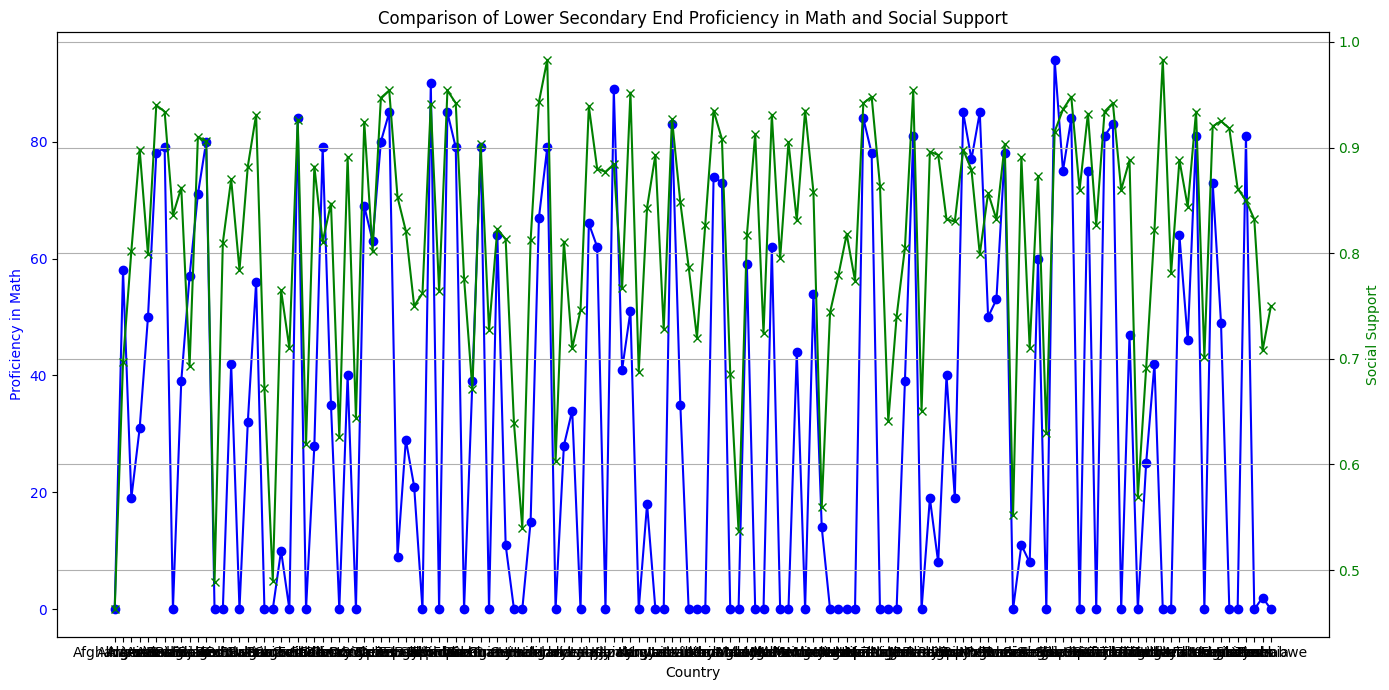

In [6]:
# math proficiency and social support

# Load the data
file_path = 'filtered_global_education_world_happiness_average.csv'
data = pd.read_csv(file_path)

# Prepare the data for plotting
countries = data['Country']
proficiency_math = data['Lower_Secondary_End_Proficiency_Math']
social_support = data['Social support']

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Proficiency Math
ax1.set_xlabel('Country')
ax1.set_ylabel('Proficiency in Math', color='blue')
ax1.plot(countries, proficiency_math, label='Proficiency in Math', color='blue', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Social Support', color='green')
ax2.plot(countries, social_support, label='Social Support', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Comparison ofProficiency in Math and Social Support')
plt.xticks(rotation=90)
fig.tight_layout()
plt.grid(True)

plt.show()



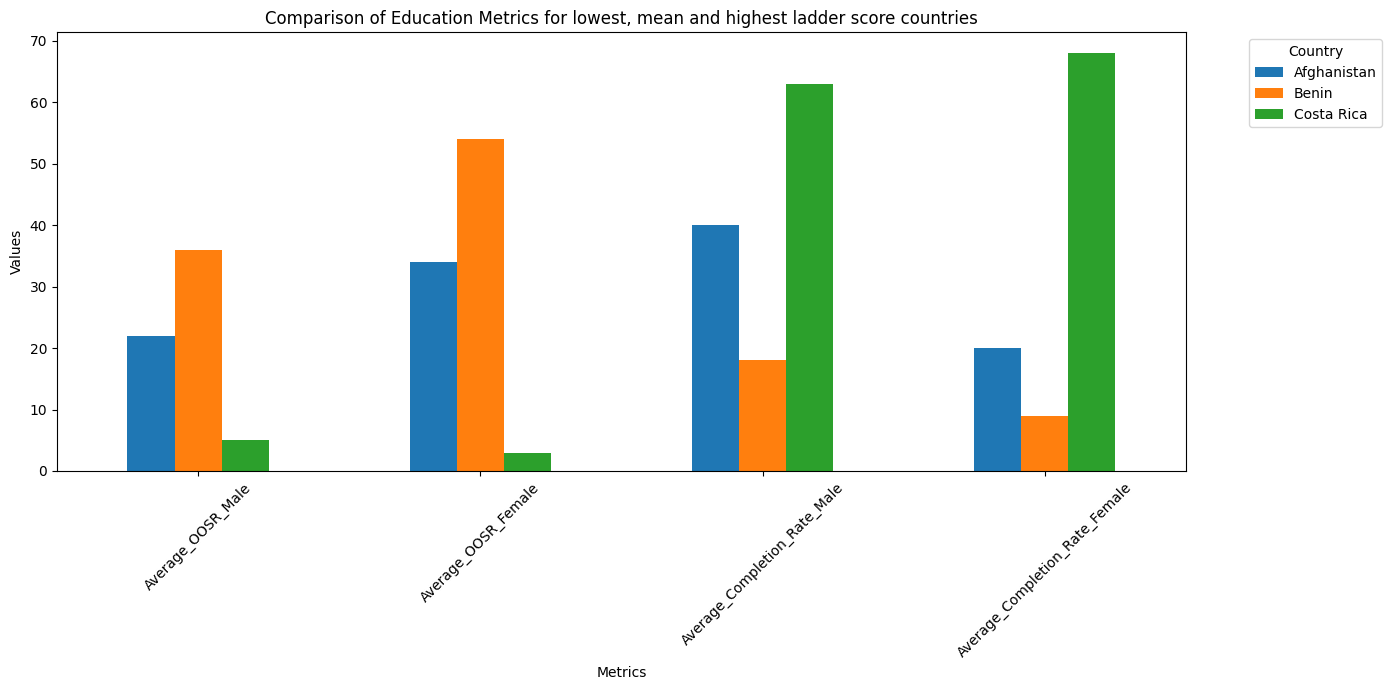

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'filtered_global_education_world_happiness_average.csv'
data = pd.read_csv(file_path)

# Filter out countries with any zero values in the relevant columns
filtered_data = data[(data['Average_OOSR_Male'] != 0) & (data['Average_OOSR_Female'] != 0) & 
                     (data['Average_Completion_Rate_Male'] != 0) & (data['Average_Completion_Rate_Female'] != 0)]

# Identify countries based on ladder score
country_lowest_ladder = filtered_data.loc[filtered_data['Ladder score'].idxmin()]
country_highest_ladder = filtered_data.loc[filtered_data['Ladder score'].idxmax()]
mean_ladder_score = filtered_data['Ladder score'].mean()
country_closest_to_mean = filtered_data.iloc[(filtered_data['Ladder score'] - mean_ladder_score).abs().argsort()[:1]]

# Combine the selected countries into one dataframe
selected_countries = pd.DataFrame([country_lowest_ladder, country_closest_to_mean.iloc[0], country_highest_ladder])

# Prepare the data for plotting
bar_data = selected_countries[['Country', 'Average_OOSR_Male', 'Average_OOSR_Female', 
                               'Average_Completion_Rate_Male', 'Average_Completion_Rate_Female']]
bar_data.set_index('Country', inplace=True)
bar_data = bar_data.T

# Plot the data
bar_data.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Education Metrics for lowest, mean and highest ladder score countries')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
import pandas as pd

# Dataset 1 variables and explanations
data1 = {
    "Variable": [
        "Country name", 
        "Regional indicator", 
        "ladder score", 
        "standard error of ladderscore", 
        "upperwhisker", 
        "lowerwhisker", 
        "logged GDP per capita", 
        "generosity", 
        "perception of corruption", 
        "ladder score in dystopia", 
        "explained by: log GDP per capita", 
        "explained by: Social support", 
        "explained by: Healthy life expectancy", 
        "explained by: Freedom to make life choices", 
        "explained by: Generosity", 
        "explained by: Perceptions of corruption", 
        "Dystopia + residual"
    ],
    "Explanation": [
        "Name of the country", 
        "Region the country belongs to", 
        "Happiness score on a scale from 0 to 10", 
        "The standard error of the ladder score", 
        "The upper whisker", 
        "The lower whisker", 
        "Logarithm of the GDP per capita", 
        "Perceived generosity", 
        "The perceived corruption on a scale from 0 to 1", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "Compared to dystopia", 
        "N.A.V."
    ]
}

# Dataset 2 variables and explanations
data2 = {
    "Variable": [
        "Countries and areas", 
        "OOSR_Pre0Primary_Age_Male", 
        "OOSR_Pre0Primary_Age_Female", 
        "OOSR_Primary_Age_Male", 
        "OOSR_Primary_Age_Female", 
        "OOSR_Lower_Secondary_Age_Male", 
        "OOSR_Lower_Secondary_Age_Female", 
        "OOSR_Upper_Secondary_Age_Male", 
        "OOSR_Upper_Secondary_Age_Female", 
        "Completion_Rate_Primary_Male", 
        "Completion_Rate_Primary_Female", 
        "Completion_Rate_Lower_Secondary_Male", 
        "Completion_Rate_Lower_Secondary_Female", 
        "Completion_Rate_Upper_Secondary_Male", 
        "Completion_Rate_Upper_Secondary_Female", 
        "Primary_End_Proficiency_Reading", 
        "Primary_End_Proficiency_Math", 
        "Gross_Primary_Education_Enrollment"
    ],
    "Explanation": [
        "Name of the country or area", 
        "Out-of-school rate for pre-primary age males", 
        "Out-of-school rate for pre-primary age females", 
        "Out-of-school rate for primary age males", 
        "Out-of-school rate for primary age females", 
        "Out-of-school rate for lower secondary age males", 
        "Out-of-school rate for lower secondary age females", 
        "Out-of-school rate for upper secondary age males", 
        "Out-of-school rate for upper secondary age females", 
        "Completion rate for primary education males", 
        "Completion rate for primary education females", 
        "Completion rate for lower secondary education males", 
        "Completion rate for lower secondary education females", 
        "Completion rate for upper secondary education males", 
        "Completion rate for upper secondary education females", 
        "Proficiency in reading at the end of primary education", 
        "Proficiency in math at the end of primary education", 
        "Gross enrollment rate for primary education"
    ]
}

# Creating DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Creating an Excel writer
with pd.ExcelWriter('variables_explanation2.xlsx') as writer:
    df2.to_excel(writer, sheet_name='Dataset1', index=False)

print("Excel file created successfully!")


Excel file created successfully!
